In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = keras.datasets.mnist

In [3]:
class_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

In [4]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

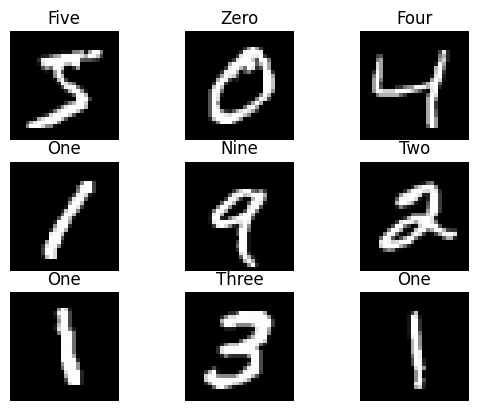

In [5]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis('off')

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\vinee\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, callbacks=keras.callbacks.EarlyStopping(patience=2))

Epoch 1/5


c:\Users\vinee\anaconda3\lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9203 - loss: 0.2543
Epoch 2/5
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:26 46ms/step - accuracy: 1.0000 - loss: 0.0084    

c:\Users\vinee\anaconda3\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9881 - loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9922 - loss: 0.0249
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9943 - loss: 0.0172
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9958 - loss: 0.0123


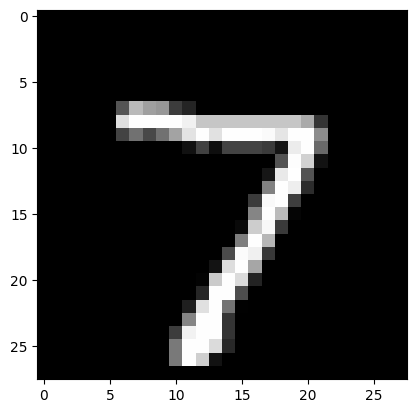

In [9]:
sample_image = X_test[0]
plt.imshow(sample_image, cmap="gray")
plt.show()

In [10]:
img = np.expand_dims(sample_image, axis=0)

In [11]:
pred = model.predict(img)
class_names[np.argmax(pred)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


'Seven'